In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd

remove duplicates: 21347/30862/24915/25021 ==> 21347/21398/21188/21195
21129
==> 21129
dataframe length: 21129
21129
19397
19392
18047
18028
allowing add_info to pass with 1257 nulls/NANs
allowing type to pass with 56 nulls/NANs
allowing bedrooms to pass with 753 nulls/NANs
dropping size because 15292 nulls/NANs is too many
dropping other_key_info because 18028 nulls/NANs is too many
allowing bullet_points to pass with 1821 nulls/NANs
allowing station_info to pass with 1 nulls/NANs
dropping hold_type because 12291 nulls/NANs is too many
allowing short_description to pass with 1 nulls/NANs
allowing long_description to pass with 4 nulls/NANs
allowing date_scraped_listing to pass with 1 nulls/NANs
allowing bedrooms_model to pass with 753 nulls/NANs
dropping auctionProvider because 18028 nulls/NANs is too many
dropping affordableBuyingScheme because 18028 nulls/NANs is too many
dropping prices.secondaryPrice because 18028 nulls/NANs is too many
dropping prices.displayPriceQualifier because

In [2]:
# Perform some basic preprocessing during dataframe retrieval
#  - screen out any duplication
#  - no other preprocessing

df_original = vv.quick_data(numeric_values_only=False, nans_forbidden=False, remove_duplicates=True, publish=True,remove_outliers=True)

print(df_original.shape)
df_original.head()

remove duplicates: 21347/30862/24915/25021 ==> 21347/21398/21188/21195
21129
==> 21129
dataframe length: 21129
21129
19397
19392
18047
18028
(18028, 101)


,Description,Price,add_info,distance_to_any_train,type,bedrooms,bathrooms,size,other_key_info,bullet_points,...,analyticsProperty.propertySubType,analyticsProperty.propertyType,analyticsProperty.retirement,analyticsProperty.selectedCurrency,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,Unnamed: 46,borough_name,floorplan_count
ids,,,,,,,,,,,,,,,,,,,,,
124059707,3 bedroom flat for sale,325000.0,"Added on 18/06/2022 by haart, Barkingside",0.5,Flat,3.0,1.0,NaN,NaN,2-3 Bedrooms;First Floor Flat;Well Presented T...,...,Flat,Flats / Apartments,False,NaN,False,No Video,Current,NaN,Redbridge,4.0
121351517,2 bedroom apartment for sale,224995.0,"Reduced on 29/04/2022 by Homechoice, Ilford",0.1,Apartment,2.0,1.0,NaN,NaN,CASH BUYERS ONLY;63 YEARS LEASE;FREE OFF STREE...,...,Apartment,Flats / Apartments,False,NaN,False,No Video,Current,NaN,Redbridge,4.0
115934666,1 bedroom ground floor flat for sale,225000.0,"Reduced on 11/02/2022 by Real Move Estates, Ch...",0.9,Ground Flat,1.0,1.0,NaN,NaN,LARGE 1 BEDROOM FLAT;LOCATED ON THE GROUND FLO...,...,Ground Flat,Flats / Apartments,False,NaN,False,No Video,Current,NaN,Redbridge,4.0
124056446,1 bedroom flat for sale,225000.0,"Added on 18/06/2022 by Ideal Locations, Ilford",0.1,Flat,1.0,1.0,NaN,NaN,Great Condition;Perfect for a FTB;Close to Exc...,...,Flat,Flats / Apartments,False,NaN,True,No Video,Current,NaN,Redbridge,1.0
85498380,1 bedroom flat for sale,225000.0,"Added on 08/06/2022 by DABORACONWAY, Wanstead ...",0.5,Flat,1.0,1.0,NaN,NaN,NaN,...,Flat,Flats / Apartments,False,NaN,False,No Video,Current,NaN,Redbridge,4.0


In [3]:
df_original[df_original["Price"] > 600000]

,Description,Price,add_info,distance_to_any_train,type,bedrooms,bathrooms,size,other_key_info,bullet_points,...,analyticsProperty.propertySubType,analyticsProperty.propertyType,analyticsProperty.retirement,analyticsProperty.selectedCurrency,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,Unnamed: 46,borough_name,floorplan_count
ids,,,,,,,,,,,,,,,,,,,,,


In [4]:
df_original[df_original["distance_to_any_train"] >= 8]

,Description,Price,add_info,distance_to_any_train,type,bedrooms,bathrooms,size,other_key_info,bullet_points,...,analyticsProperty.propertySubType,analyticsProperty.propertyType,analyticsProperty.retirement,analyticsProperty.selectedCurrency,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,Unnamed: 46,borough_name,floorplan_count
ids,,,,,,,,,,,,,,,,,,,,,


In [5]:
df_original[['bathrooms','bathrooms_model']][df_original["bathrooms"] >= 8]

,bathrooms,bathrooms_model
ids,,


In [6]:
df_original[['floorplan_count']][df_original["floorplan_count"] >= 18]

,floorplan_count
ids,


In [7]:
columns = df_original.columns
i = -1
import matplotlib.pyplot as plt

columns

Index(['Description', 'Price', 'add_info', 'distance_to_any_train', 'type',
       'bedrooms', 'bathrooms', 'size', 'other_key_info', 'bullet_points',
       ...
       'analyticsProperty.propertySubType', 'analyticsProperty.propertyType',
       'analyticsProperty.retirement', 'analyticsProperty.selectedCurrency',
       'analyticsProperty.soldSTC', 'analyticsProperty.videoProvider',
       'analyticsProperty.viewType', 'Unnamed: 46', 'borough_name',
       'floorplan_count'],
      dtype='object', length=101)

In [8]:
i = -1


def next_histogram():
    global i

    values = len(df_original[columns[i]].unique())

    skipped = []
    while values < 3 or values > 50:  #if values <= 150:
        skipped.append(columns[i] + "(" + str(values)+ ")")
        i = i + 1
        values = len(df_original[columns[i]].unique())

    if skipped:
        print(f'skipping {"/".join(skipped)}: too many value types or not enough value types')
        print()

    print(i, columns[i], df_original[columns[i]].dtype, values)

    try:
        #df_original[columns[i]].hist(figsize=(20, 8), bins=20)
        df_original[columns[i]].hist(figsize=(20, 8))
        if values > 15:
            plt.xticks(rotation=45)
        plt.show()
    except:
        print("failed to load graph")

skipping Description(96)/Price(757)/add_info(15199): too many value types or not enough value types

3 distance_to_any_train float64 37


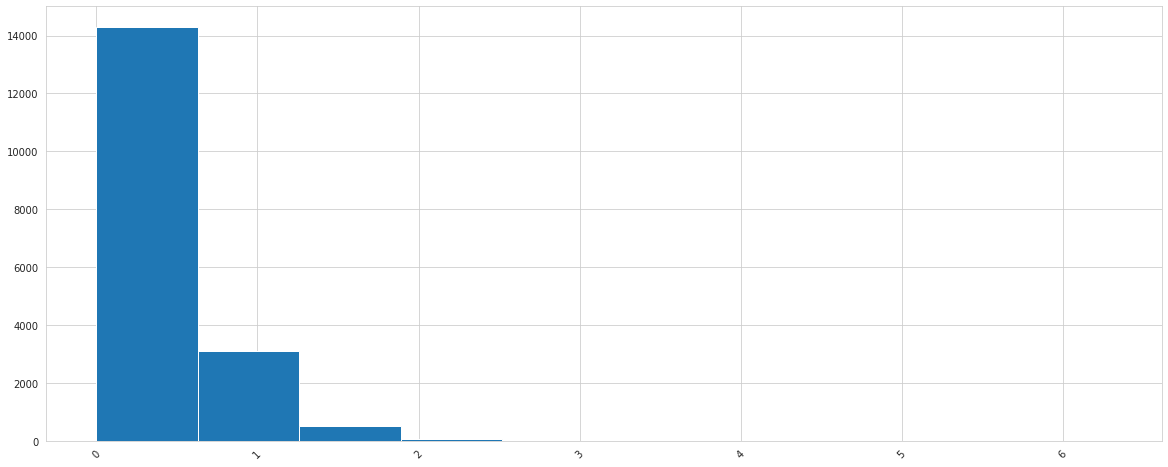

In [9]:
i = (i + 1) % len(columns)
next_histogram()

4 type object 28


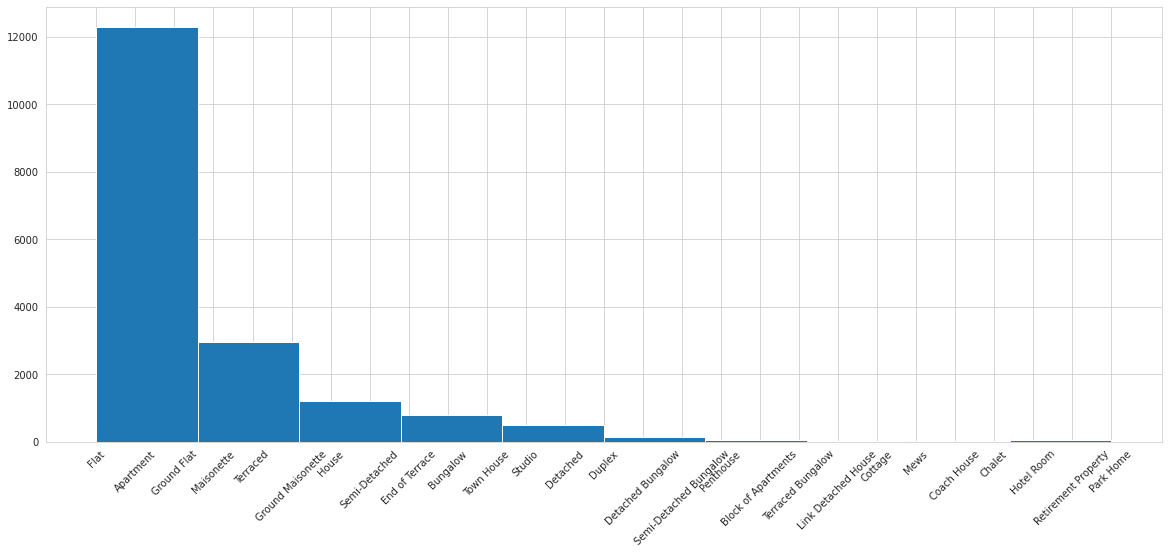

In [10]:
i = (i + 1) % len(columns)
next_histogram()

5 bedrooms float64 7


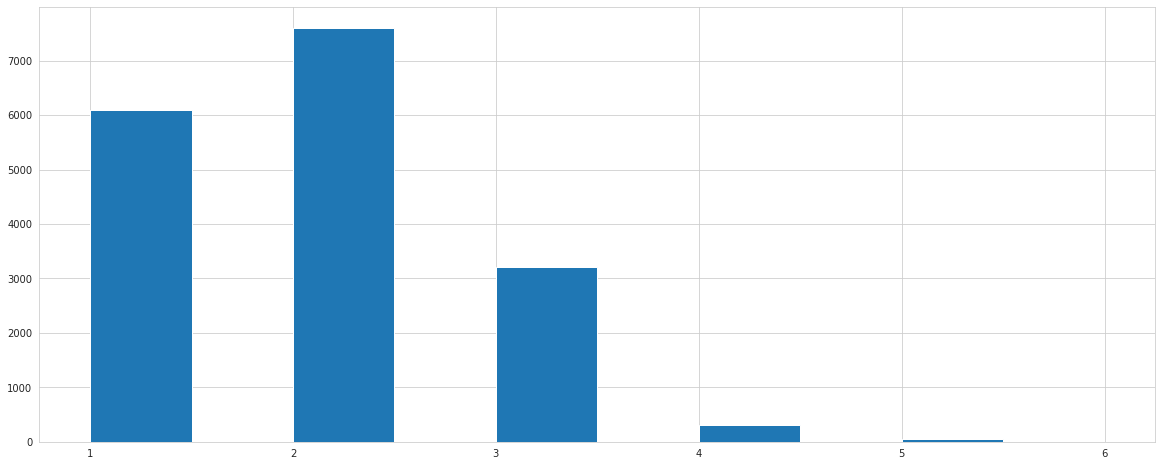

In [11]:
i = (i + 1) % len(columns)
next_histogram()

6 bathrooms float64 5


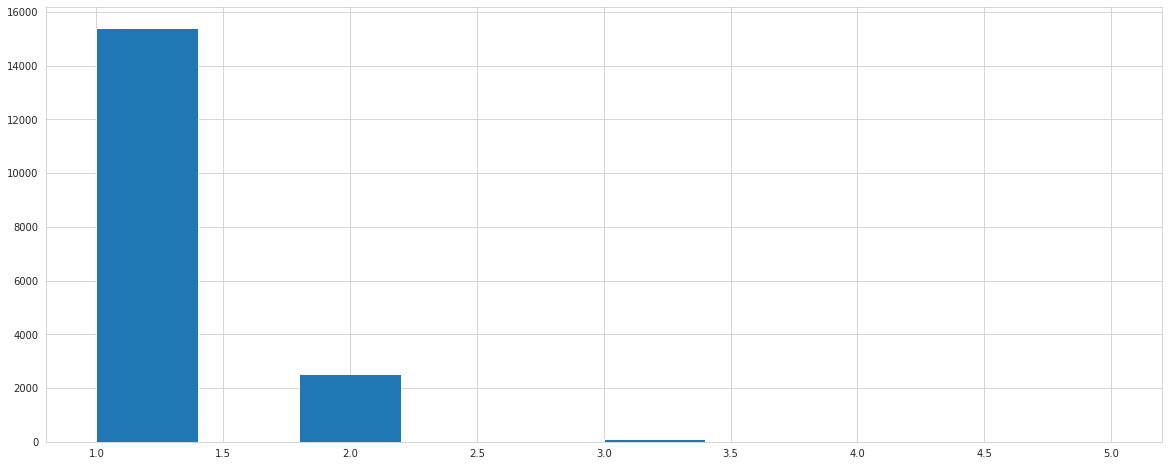

In [12]:
i = (i + 1) % len(columns)
next_histogram()

skipping size(1037)/other_key_info(1)/bullet_points(15906)/station_info(10724): too many value types or not enough value types

11 hold_type object 4


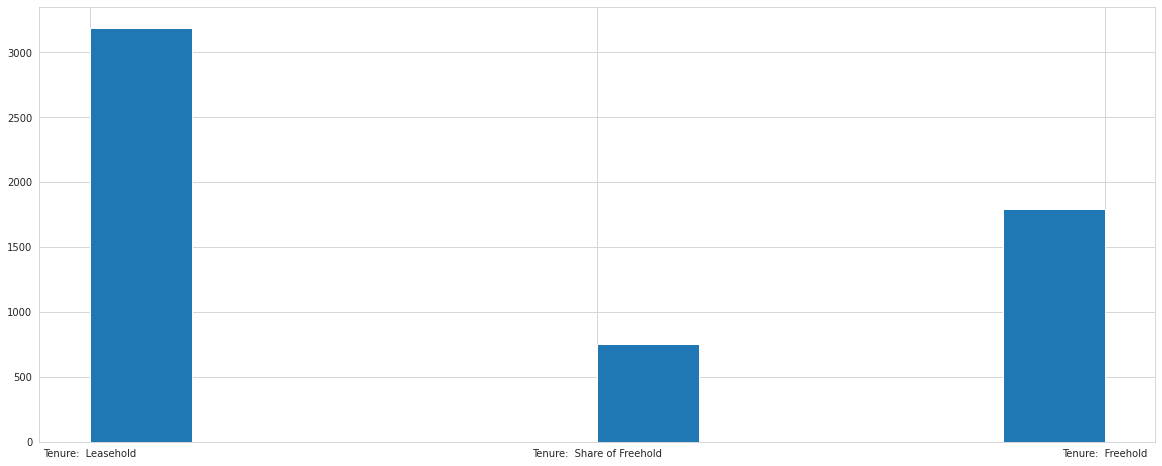

In [13]:
i = (i + 1) % len(columns)
next_histogram()

skipping short_description(999)/long_description(17846)/virtualTours(4592)/rooms(2169)/nearestAirports(1)/nearestStations(16183)/showSchoolInfo(1)/channel(2)/sizings(2480): too many value types or not enough value types

21 bedrooms_model float64 7


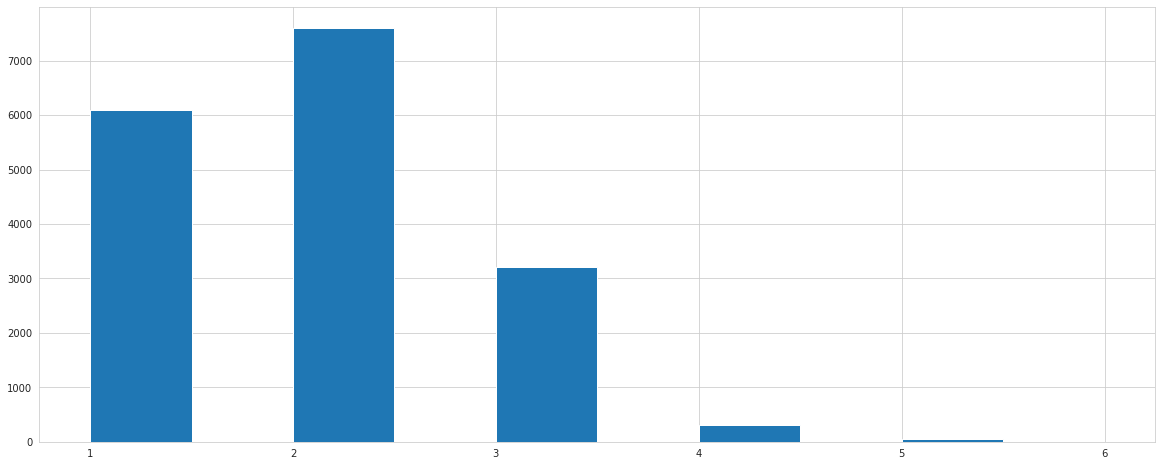

In [14]:
i = (i + 1) % len(columns)
next_histogram()

22 bathrooms_model float64 5


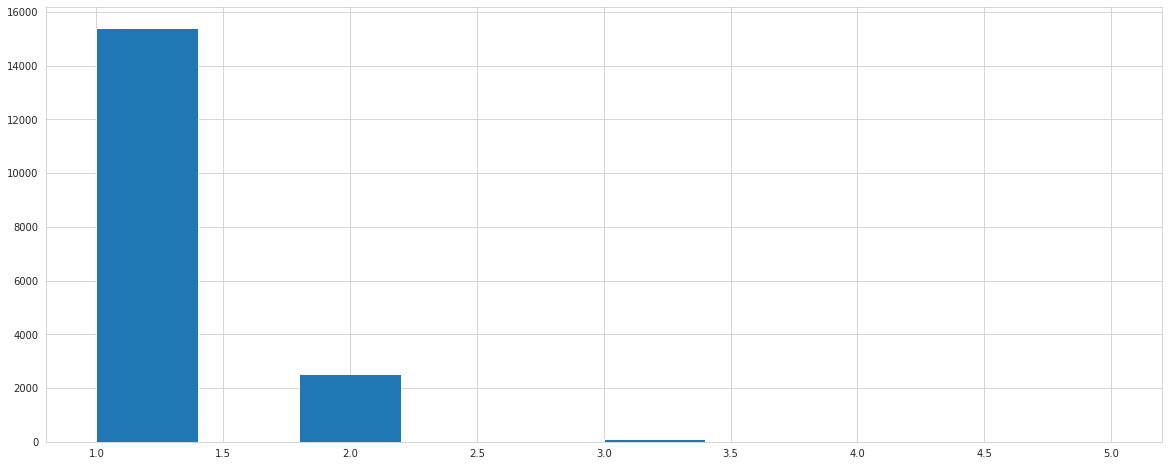

In [15]:
i = (i + 1) % len(columns)
next_histogram()

skipping transactionType(1): too many value types or not enough value types

24 tags object 16


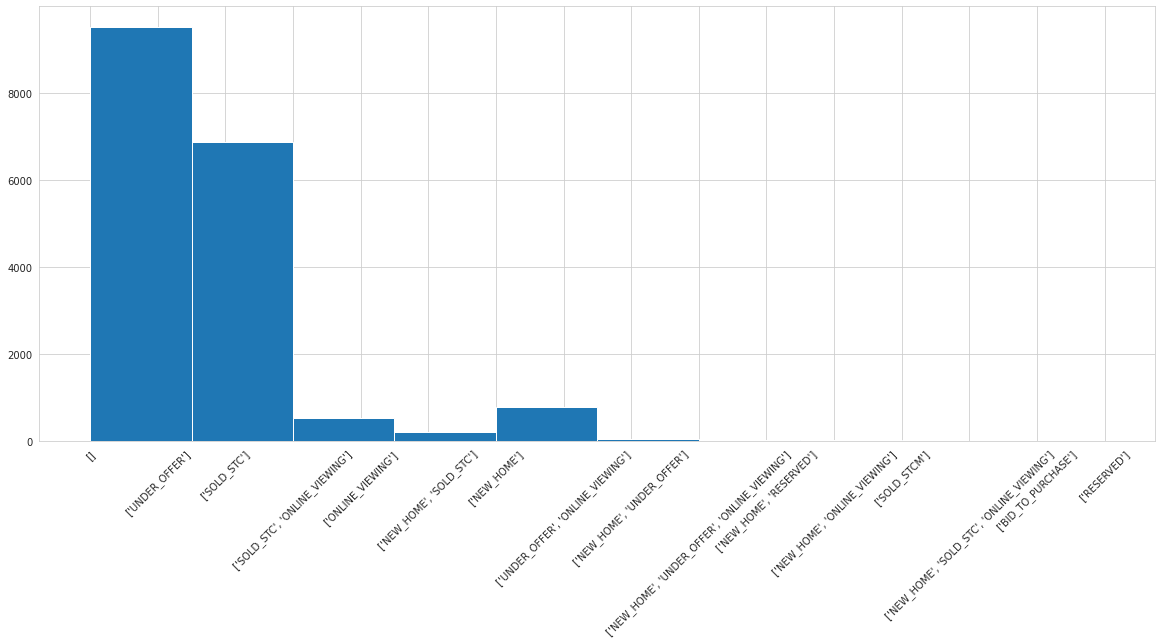

In [16]:
i = (i + 1) % len(columns)
next_histogram()

skipping infoReelItems(2071): too many value types or not enough value types

26 soldPropertyType object 5


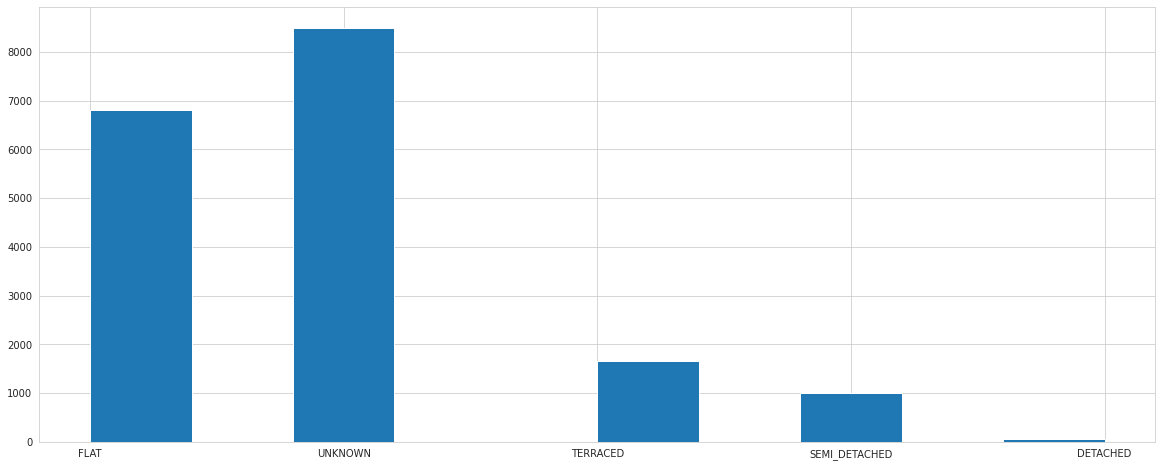

In [17]:
i = (i + 1) % len(columns)
next_histogram()

skipping auctionProvider(1): too many value types or not enough value types

28 propertySubType object 28


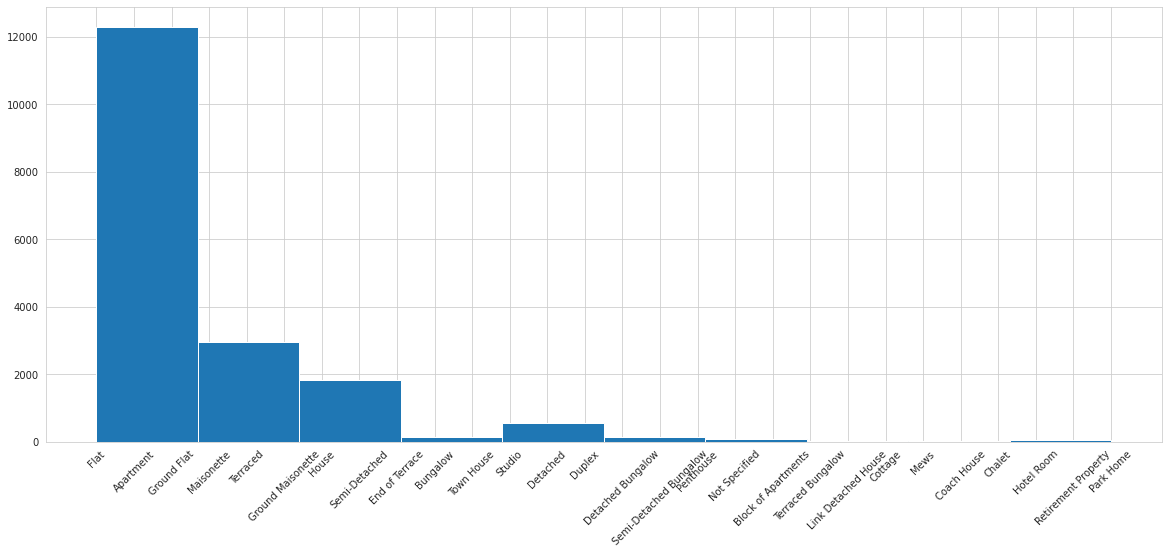

In [18]:
i = (i + 1) % len(columns)
next_histogram()

skipping businessForSale(1)/commercial(1)/commercialUseClasses(1)/affordableBuyingScheme(1)/status.published(2)/status.archived(2)/prices.primaryPrice(758)/prices.secondaryPrice(1): too many value types or not enough value types

37 prices.displayPriceQualifier object 9


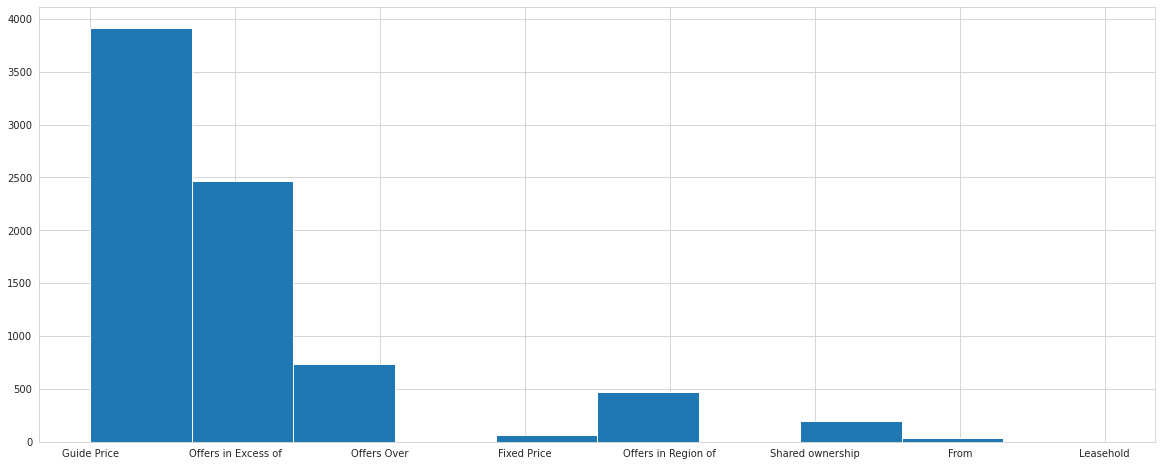

In [19]:
i = (i + 1) % len(columns)
next_histogram()

skipping prices.pricePerSqFt(2398)/prices.exchangeRate(1)/address.outcode(222)/location.latitude(15153)/location.longitude(15716)/listingHistory.listingUpdateReason(1038): too many value types or not enough value types

44 tenure.tenureType object 5


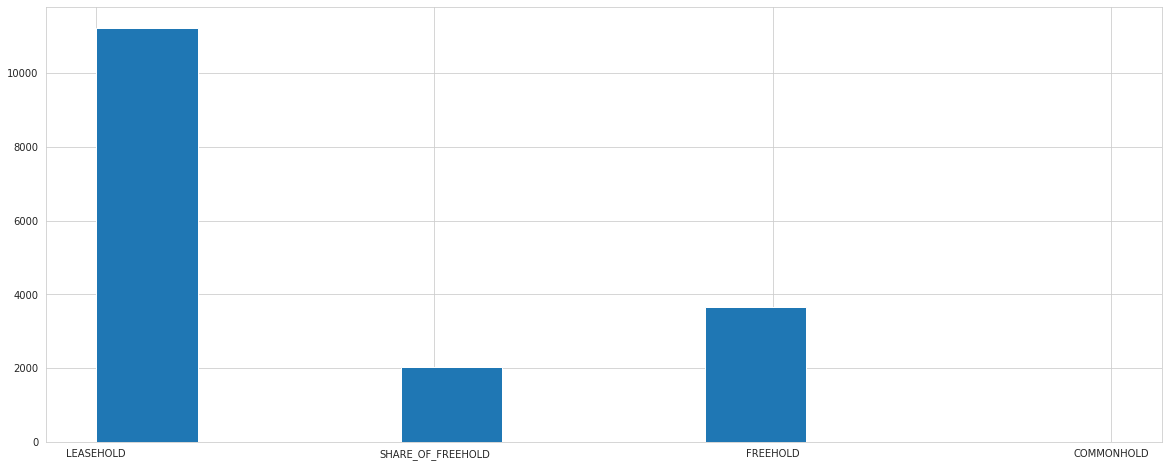

In [20]:
i = (i + 1) % len(columns)
next_histogram()

skipping tenure.yearsRemainingOnLease(192)/tenure.message(267)/sharedOwnership.sharedOwnership(2): too many value types or not enough value types

48 sharedOwnership.ownershipPercentage float64 6


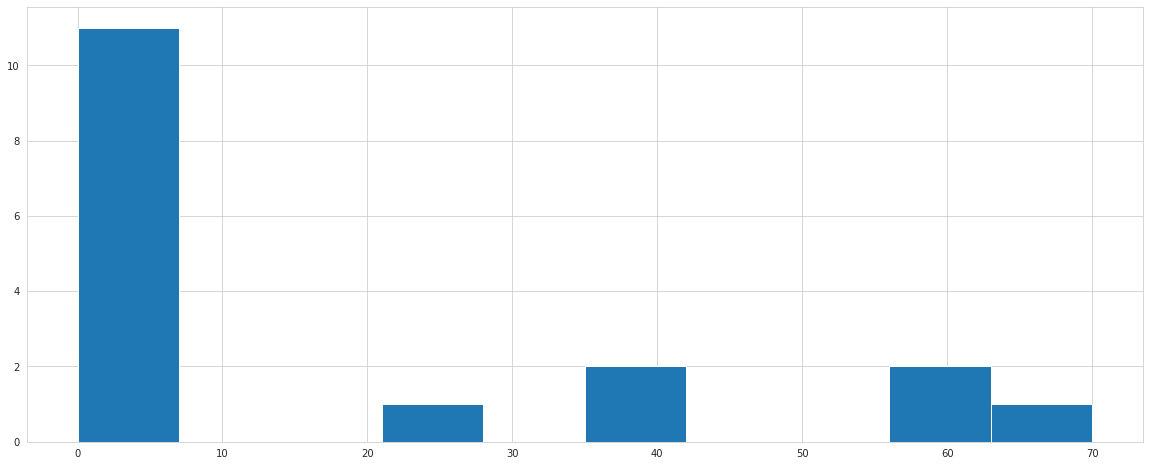

In [21]:
i = (i + 1) % len(columns)
next_histogram()

49 sharedOwnership.rentPrice float64 3


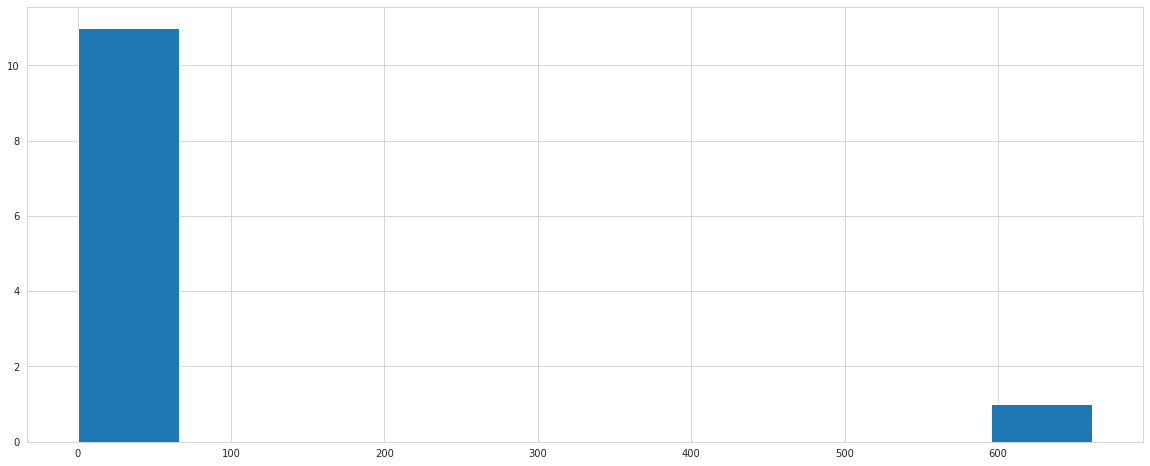

In [22]:
i = (i + 1) % len(columns)
next_histogram()

50 sharedOwnership.rentFrequency object 3


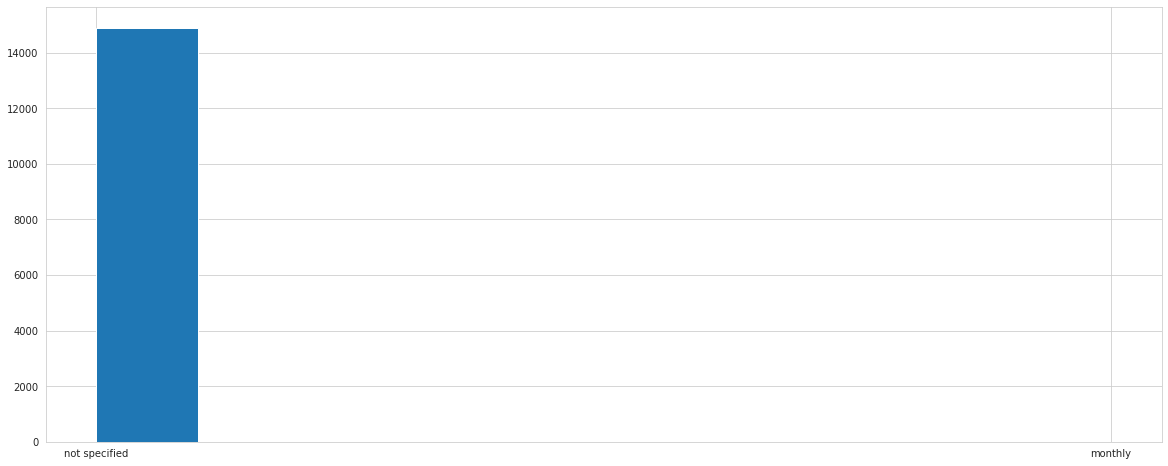

In [23]:
i = (i + 1) % len(columns)
next_histogram()

skipping livingCosts.councilTaxExempt(1)/livingCosts.councilTaxIncluded(2): too many value types or not enough value types

53 livingCosts.annualGroundRent float64 21


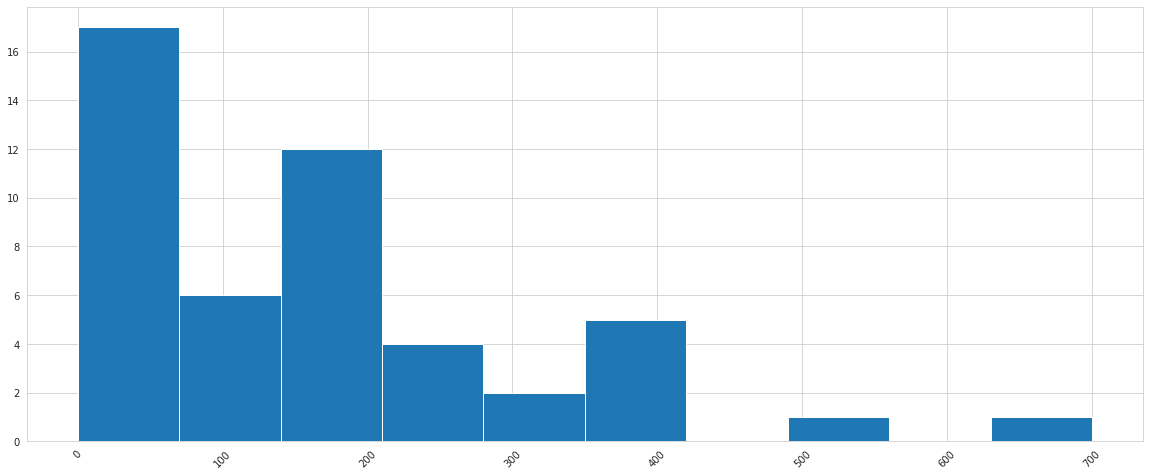

In [24]:
i = (i + 1) % len(columns)
next_histogram()

54 livingCosts.groundRentReviewPeriodInYears float64 5


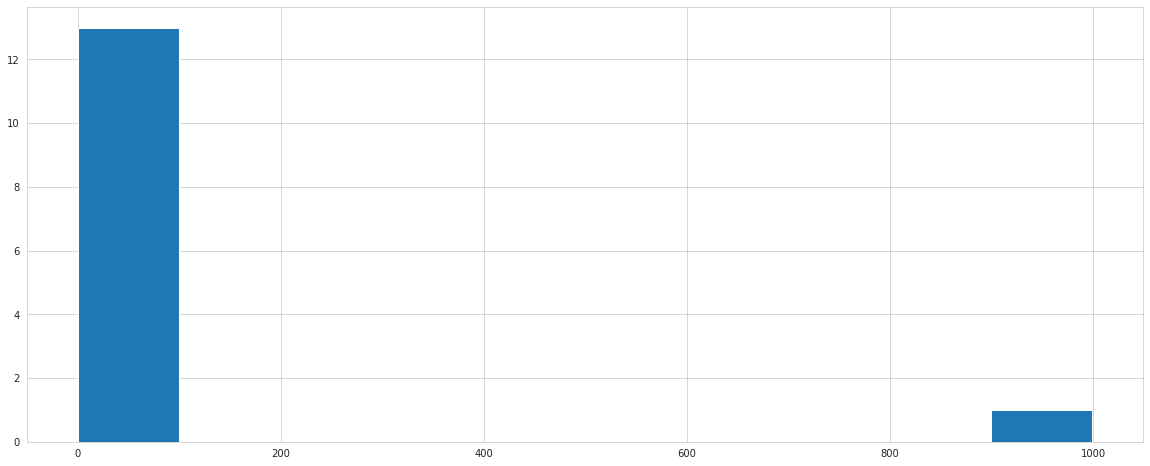

In [25]:
i = (i + 1) % len(columns)
next_histogram()

skipping livingCosts.groundRentPercentageIncrease(2): too many value types or not enough value types

56 livingCosts.annualServiceCharge float64 47


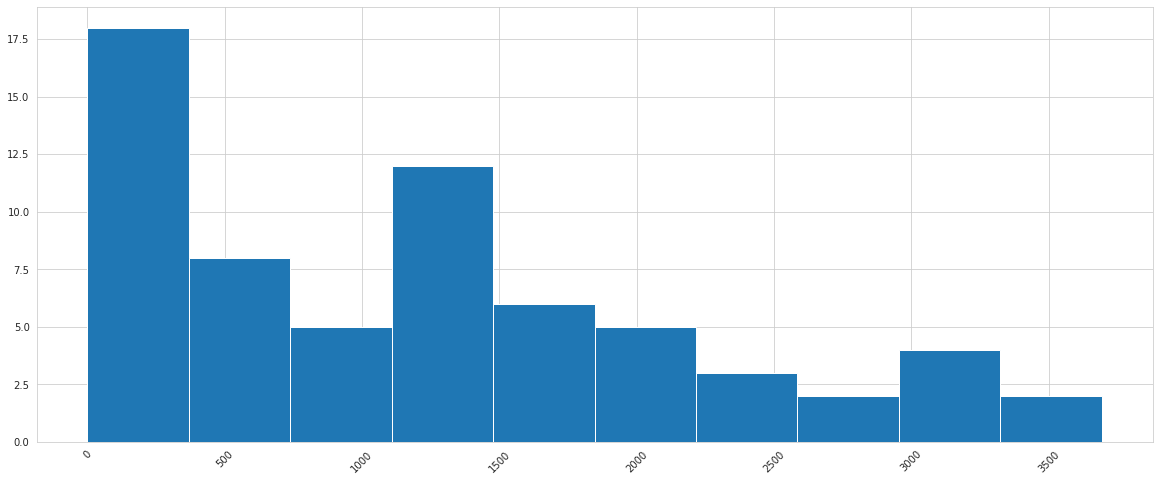

In [26]:
i = (i + 1) % len(columns)
next_histogram()

57 livingCosts.councilTaxBand object 10


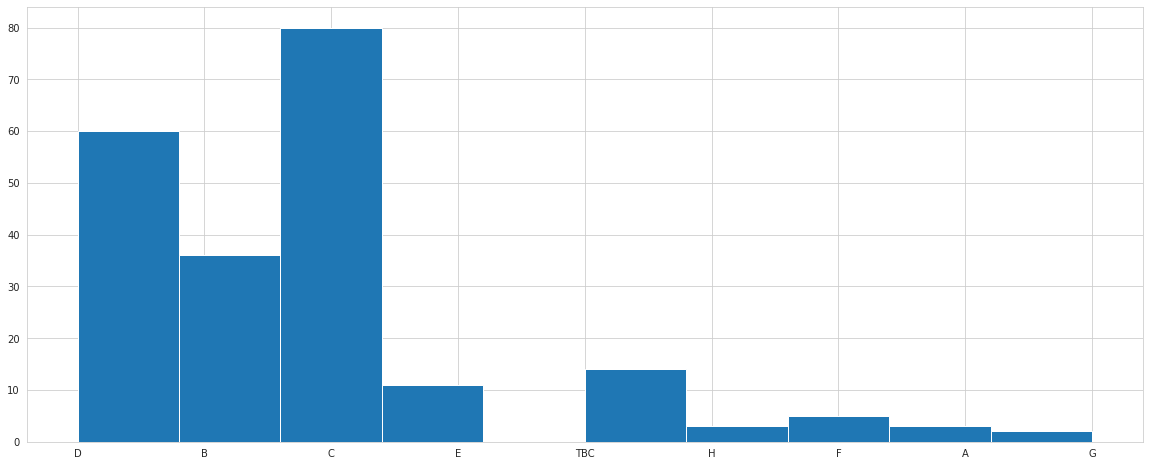

In [27]:
i = (i + 1) % len(columns)
next_histogram()

58 auctionProvider.endDate object 7


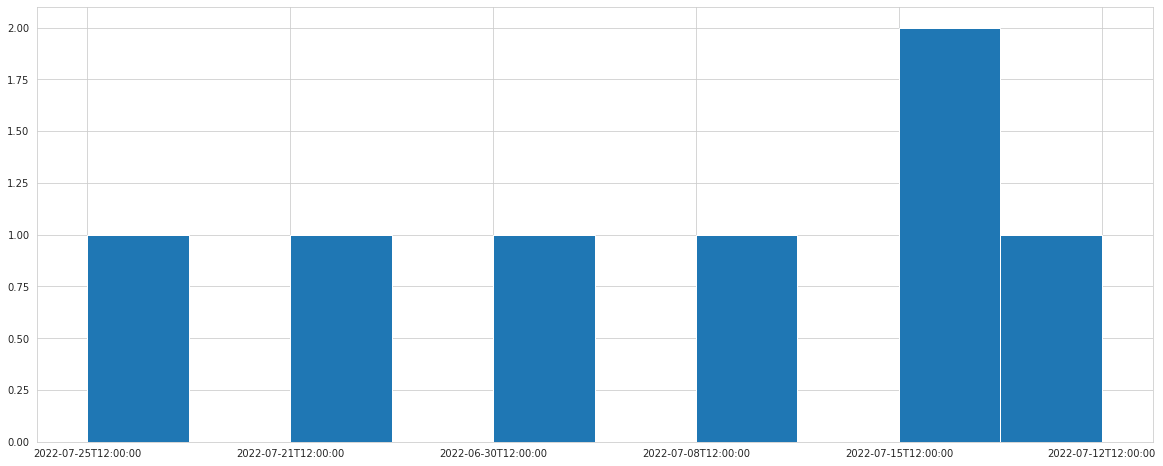

In [28]:
i = (i + 1) % len(columns)
next_histogram()

59 auctionProvider.auctionTimeRemaining object 8


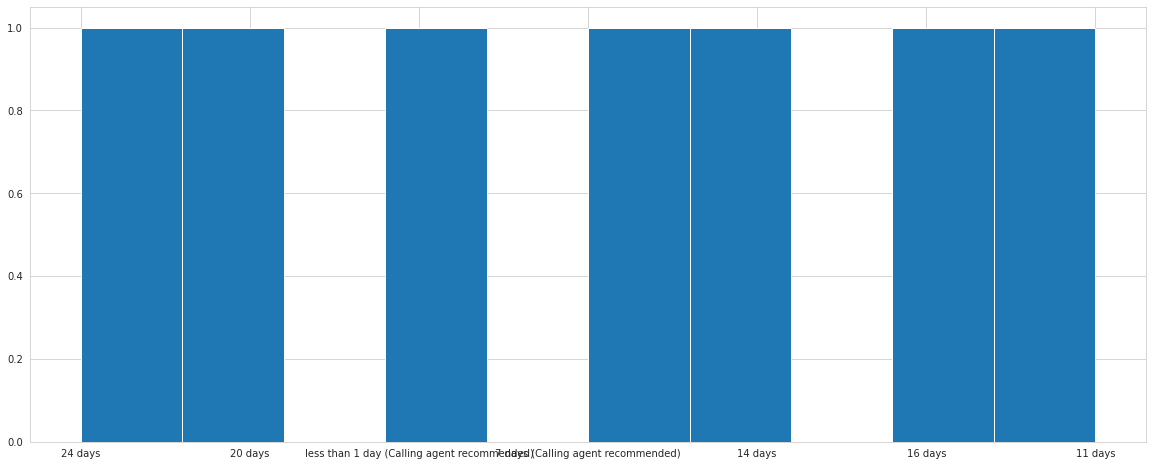

In [29]:
i = (i + 1) % len(columns)
next_histogram()

skipping auctionProvider.bid(1): too many value types or not enough value types

61 analyticsBranch.agentType object 4


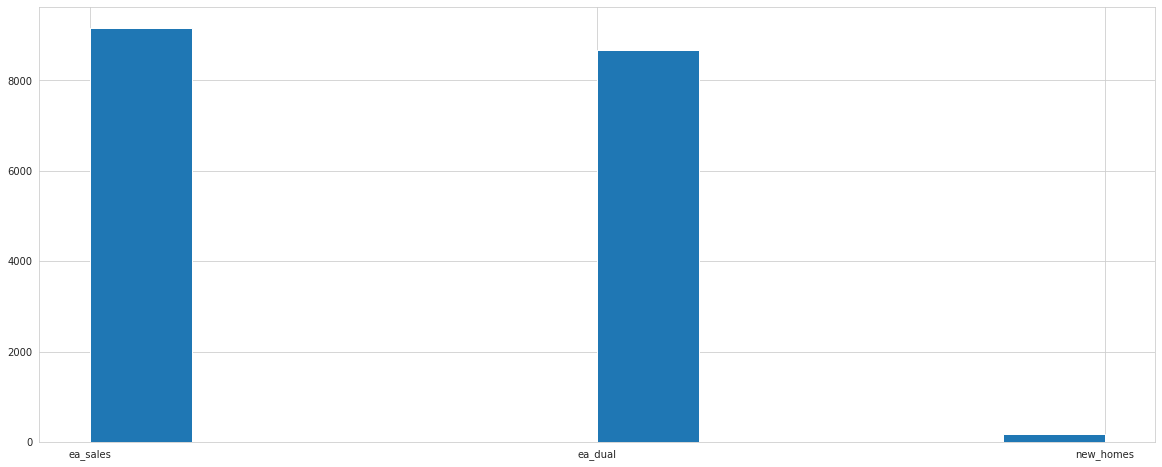

In [30]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsBranch.branchId(1980)/analyticsBranch.branchName(716)/analyticsBranch.brandName(1114)/analyticsBranch.companyName(1057)/analyticsBranch.companyTradingName(775): too many value types or not enough value types

67 analyticsBranch.companyType object 5


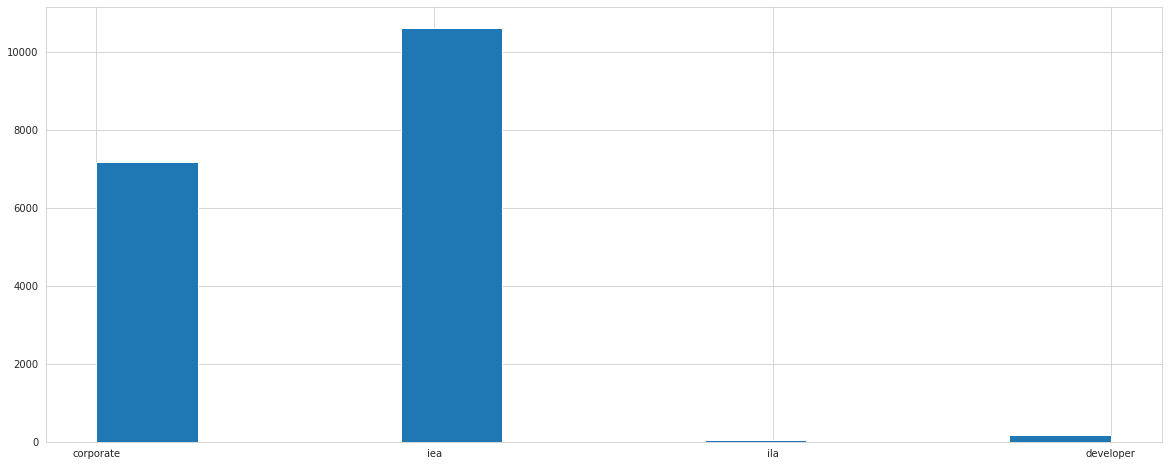

In [31]:
i = (i + 1) % len(columns)
next_histogram()

68 analyticsBranch.pageType object 3


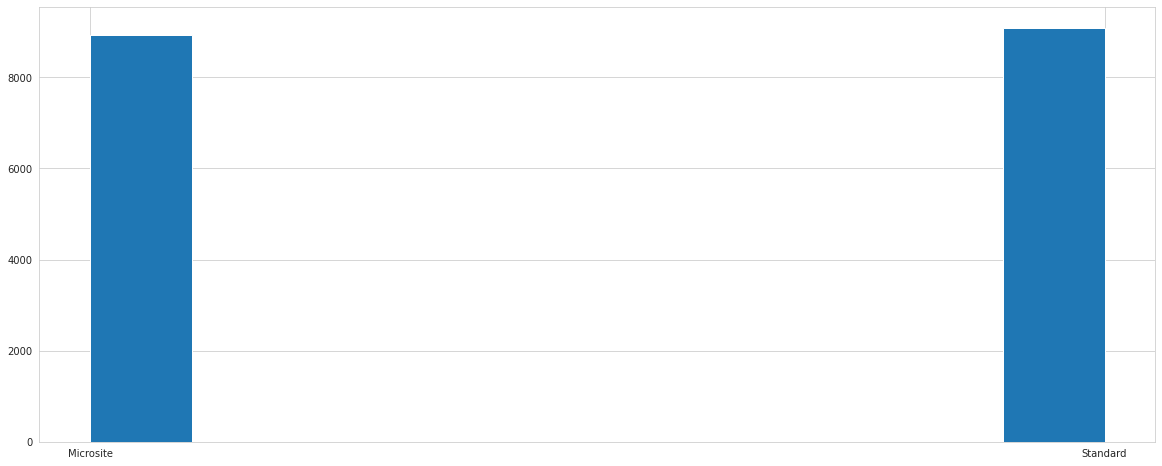

In [32]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.added(732): too many value types or not enough value types

70 analyticsProperty.auctionOnly object 3
failed to load graph


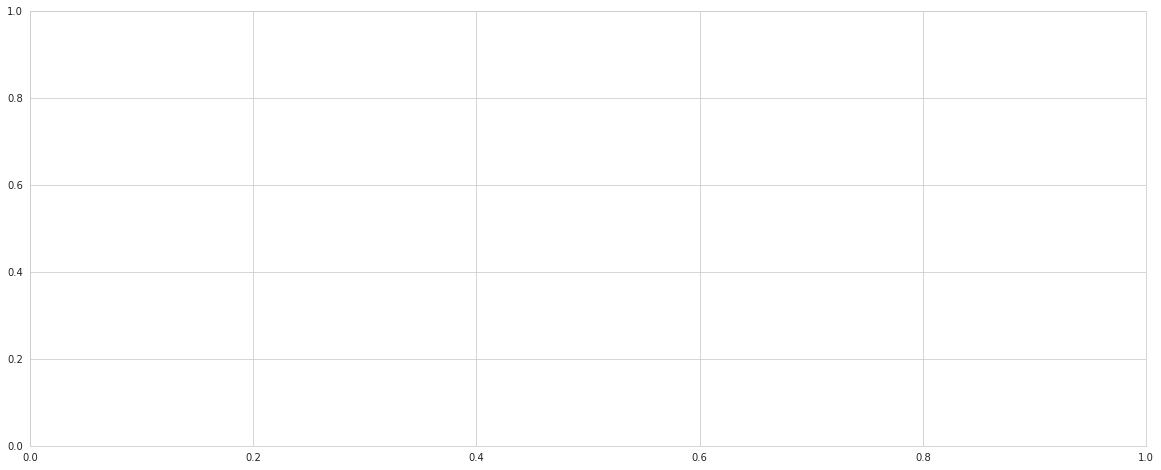

In [33]:
i = (i + 1) % len(columns)
next_histogram()

71 analyticsProperty.beds float64 8


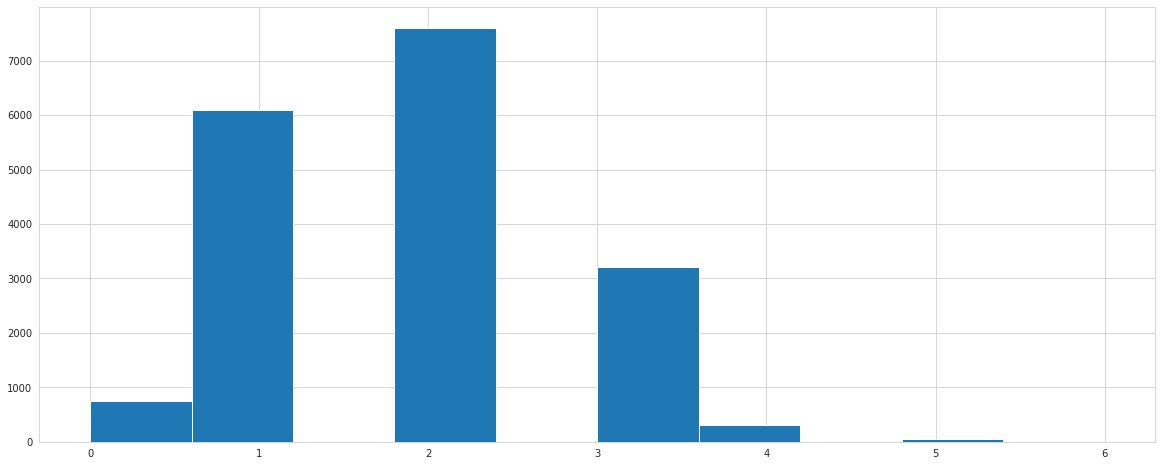

In [34]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.businessForSale(2)/analyticsProperty.country(2)/analyticsProperty.currency(2): too many value types or not enough value types

75 analyticsProperty.floorplanCount float64 6


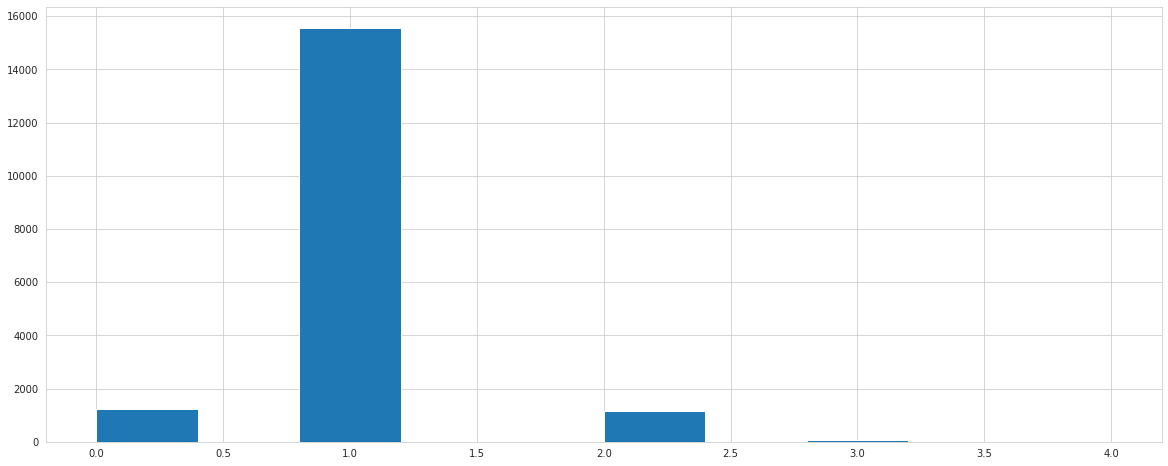

In [35]:
i = (i + 1) % len(columns)
next_histogram()

76 analyticsProperty.furnishedType object 6


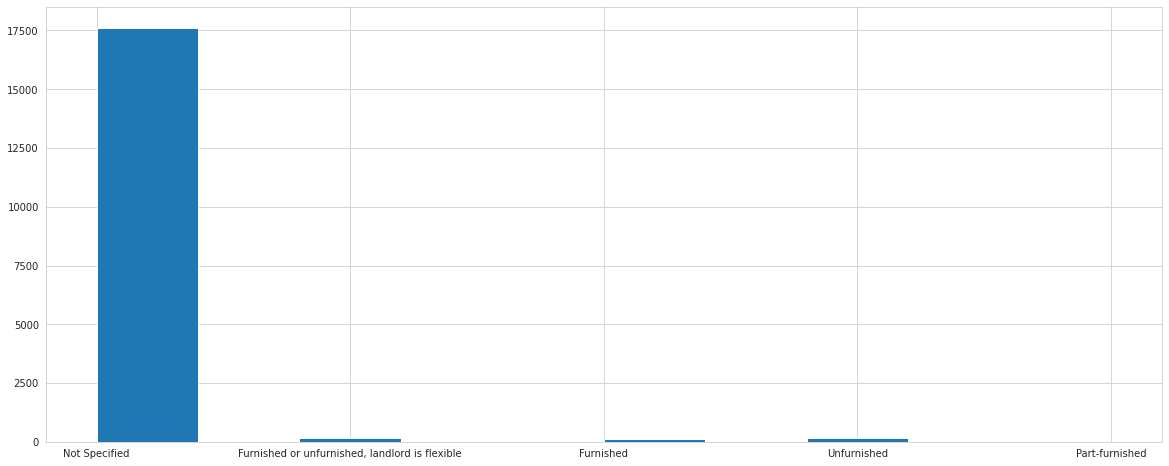

In [36]:
i = (i + 1) % len(columns)
next_histogram()

77 analyticsProperty.hasOnlineViewing object 3
failed to load graph


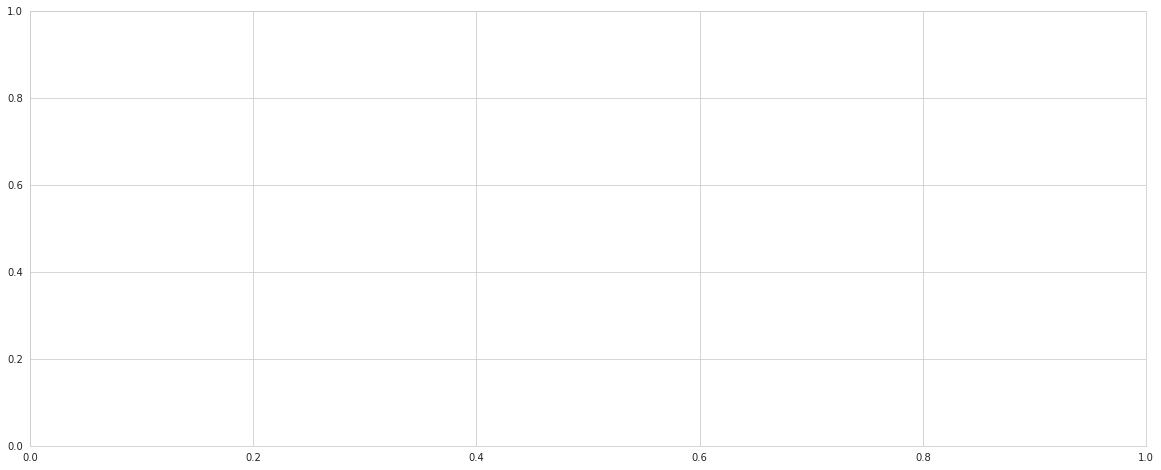

In [37]:
i = (i + 1) % len(columns)
next_histogram()

78 analyticsProperty.imageCount float64 46


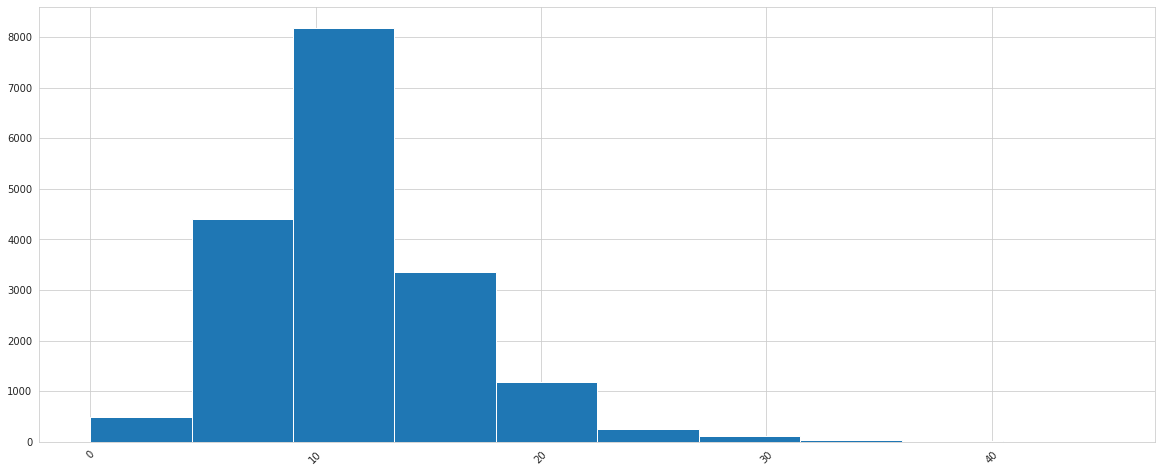

In [38]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.latitude(15152)/analyticsProperty.longitude(15715)/analyticsProperty.letAgreed(2)/analyticsProperty.lettingType(2)/analyticsProperty.maxSizeAc(976)/analyticsProperty.maxSizeFt(844)/analyticsProperty.minSizeAc(974)/analyticsProperty.minSizeFt(842): too many value types or not enough value types

87 analyticsProperty.ownership object 3


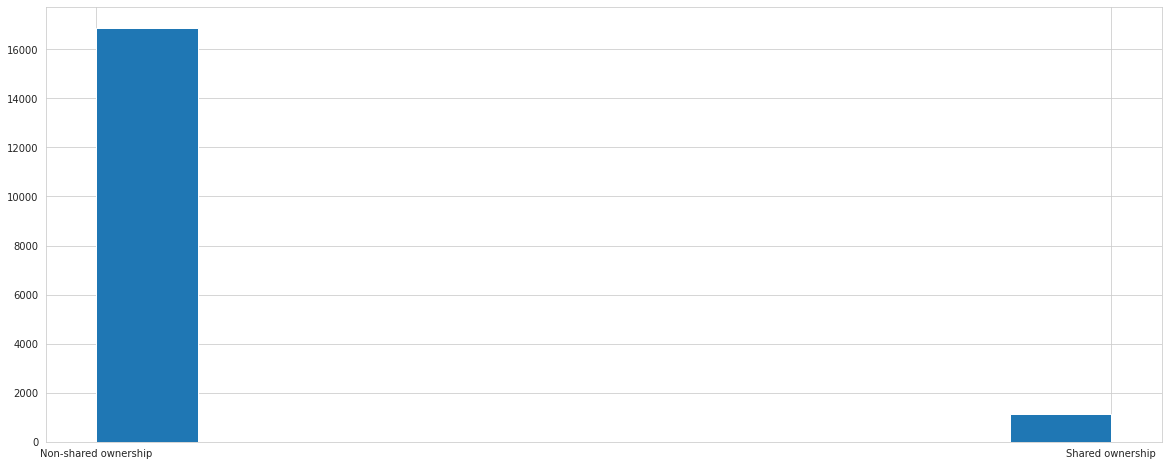

In [39]:
i = (i + 1) % len(columns)
next_histogram()

88 analyticsProperty.preOwned object 3


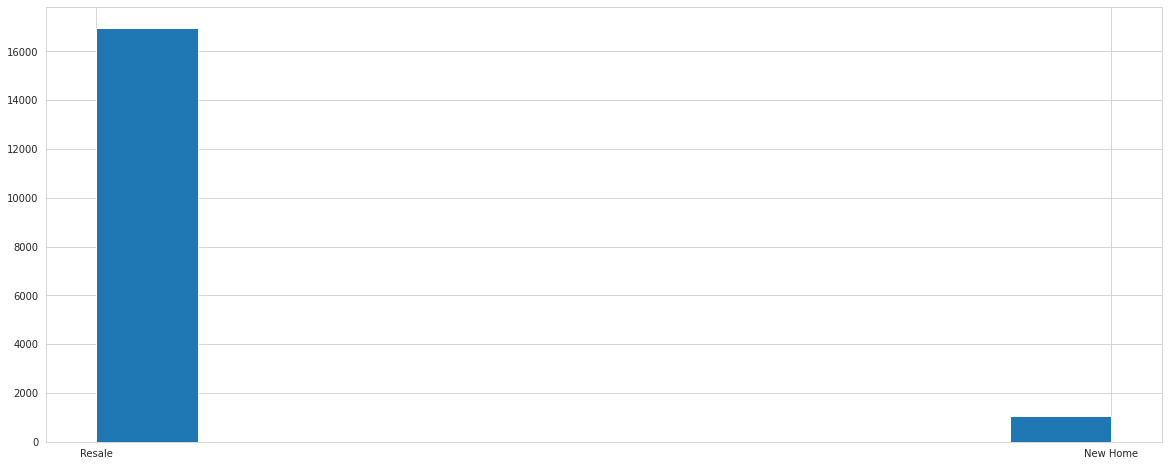

In [40]:
i = (i + 1) % len(columns)
next_histogram()

89 analyticsProperty.priceQualifier object 10


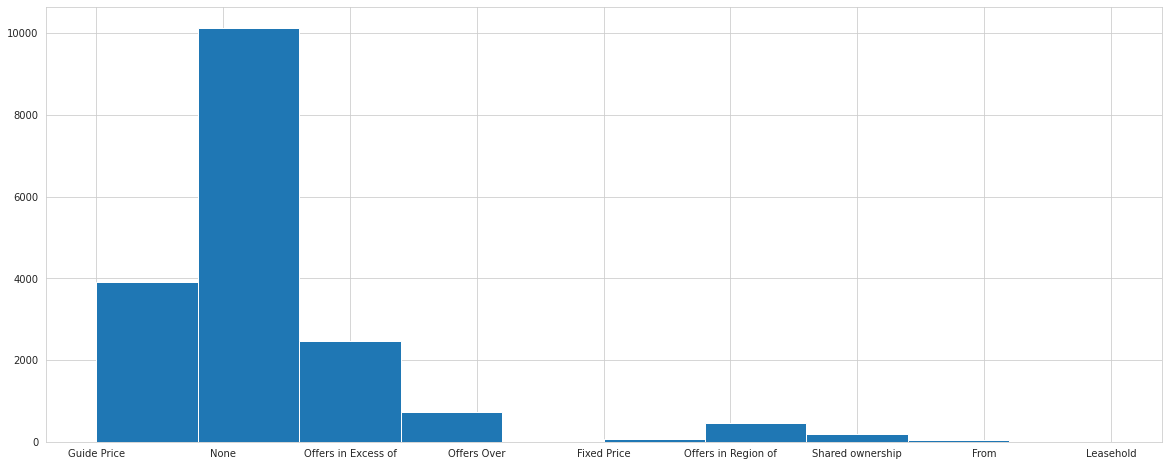

In [41]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.propertyId(18027): too many value types or not enough value types

91 analyticsProperty.propertySubType object 29


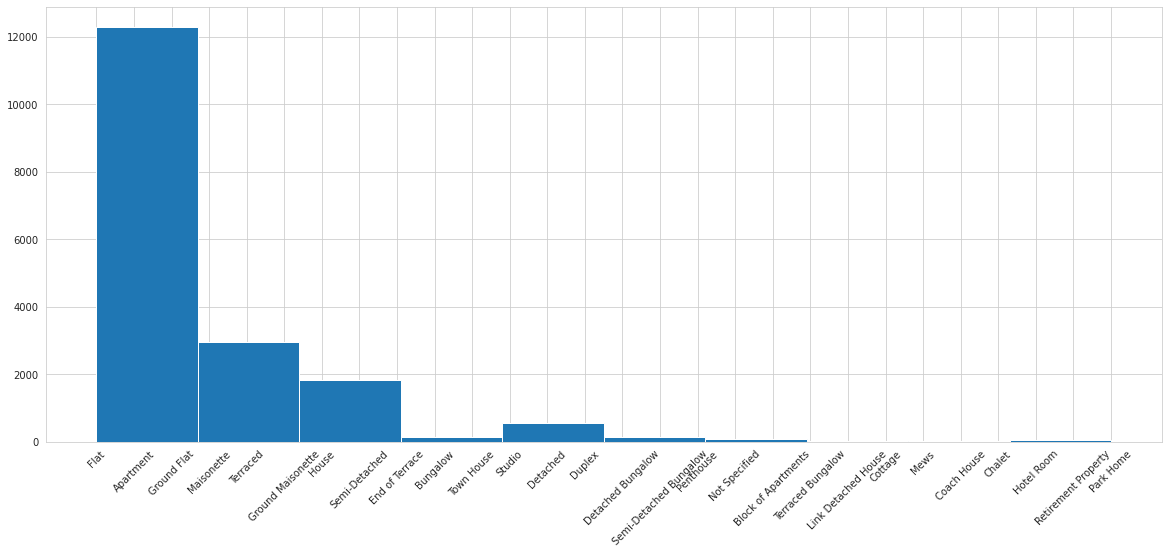

In [42]:
i = (i + 1) % len(columns)
next_histogram()

92 analyticsProperty.propertyType object 7


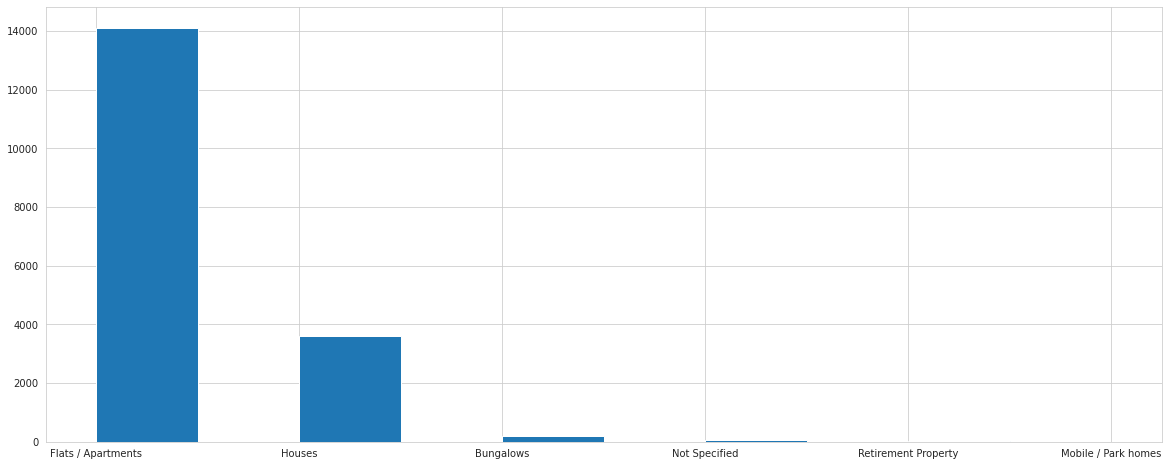

In [43]:
i = (i + 1) % len(columns)
next_histogram()

93 analyticsProperty.retirement object 3
failed to load graph


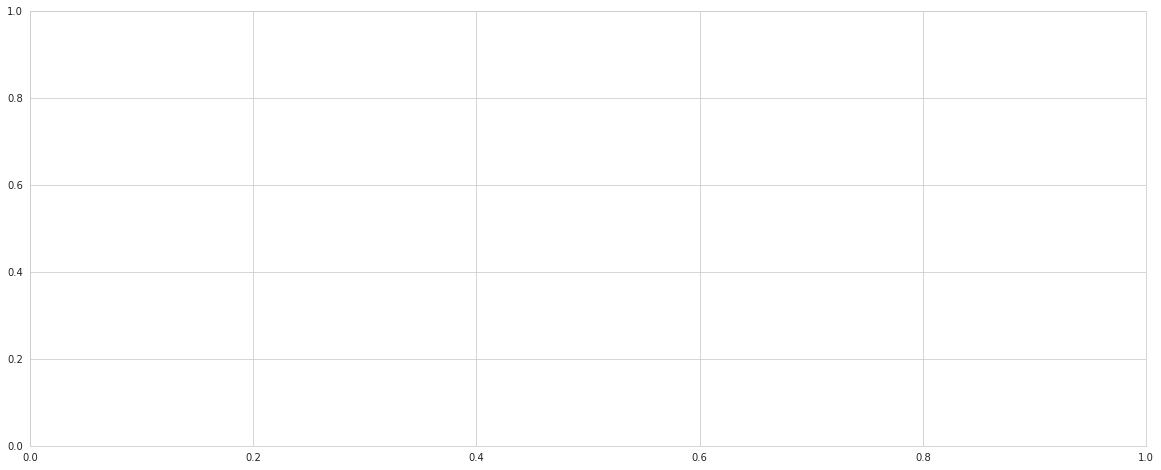

In [44]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.selectedCurrency(1): too many value types or not enough value types

95 analyticsProperty.soldSTC object 3
failed to load graph


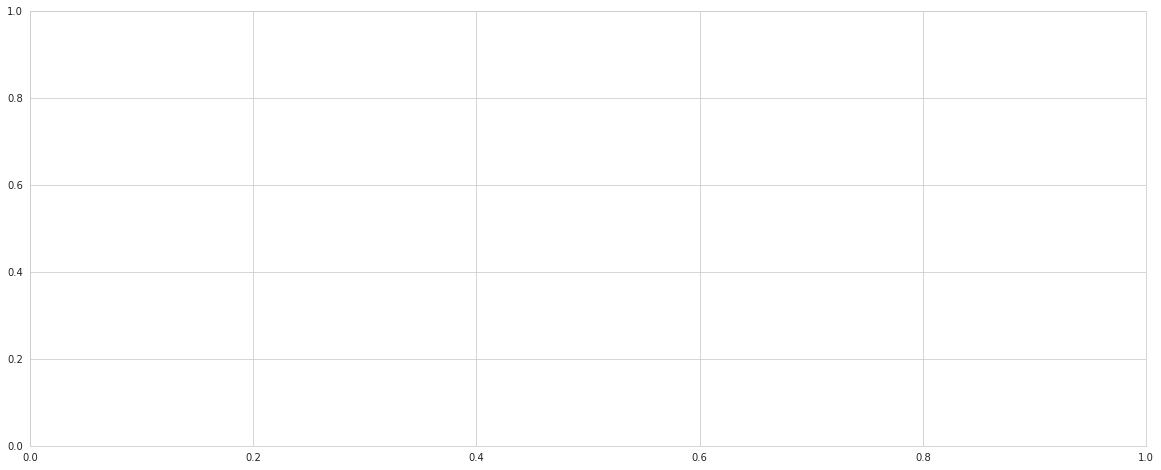

In [45]:
i = (i + 1) % len(columns)
next_histogram()

96 analyticsProperty.videoProvider object 4


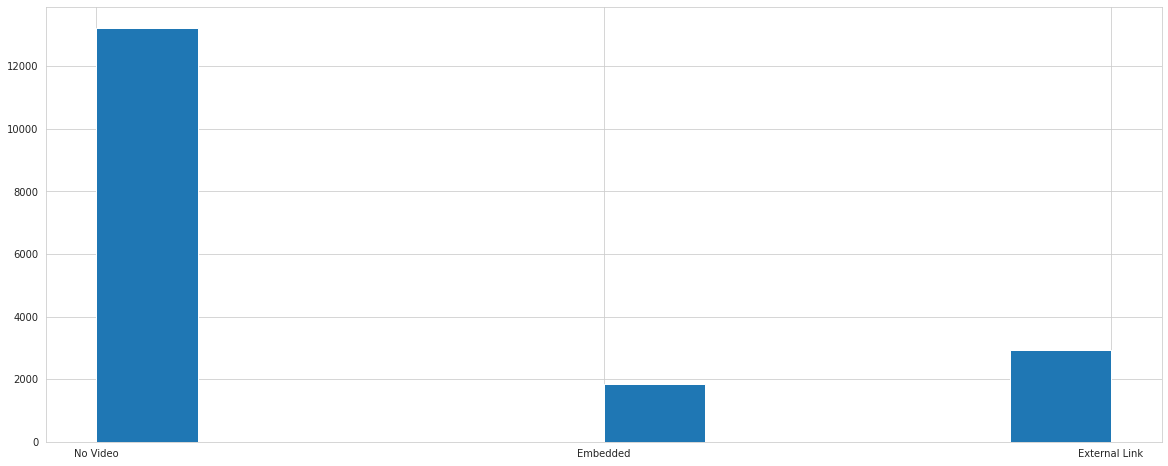

In [46]:
i = (i + 1) % len(columns)
next_histogram()

97 analyticsProperty.viewType object 3


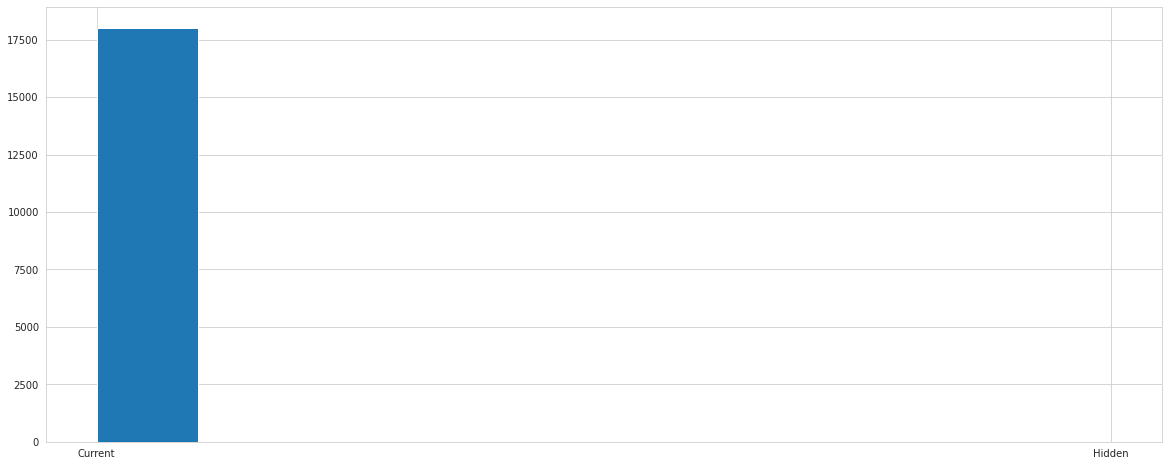

In [47]:
i = (i + 1) % len(columns)
next_histogram()

skipping Unnamed: 46(1): too many value types or not enough value types

99 borough_name object 26


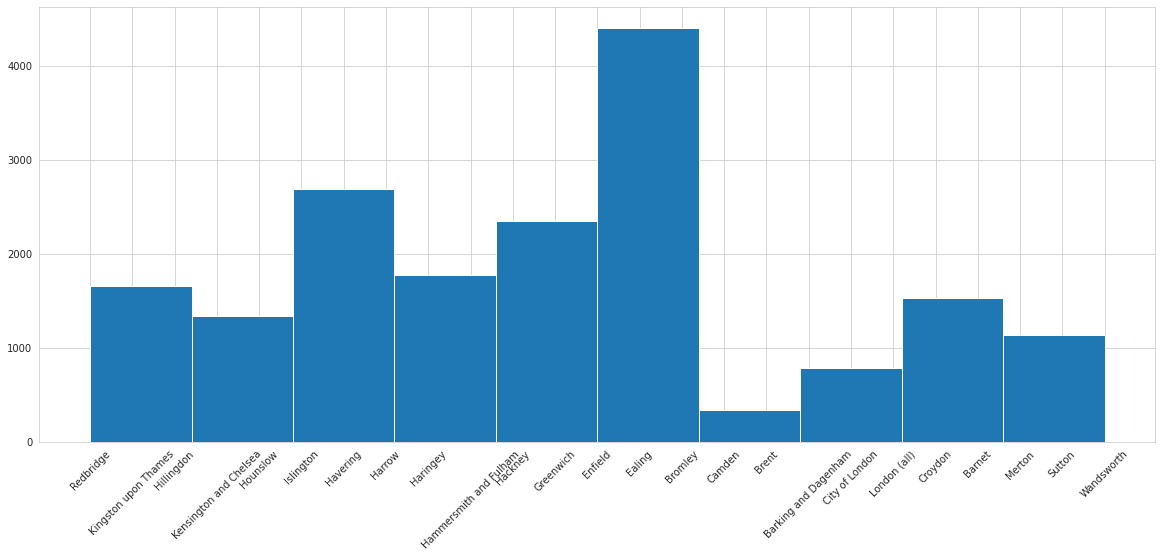

In [48]:
i = (i + 1) % len(columns)
next_histogram()

100 floorplan_count float64 9


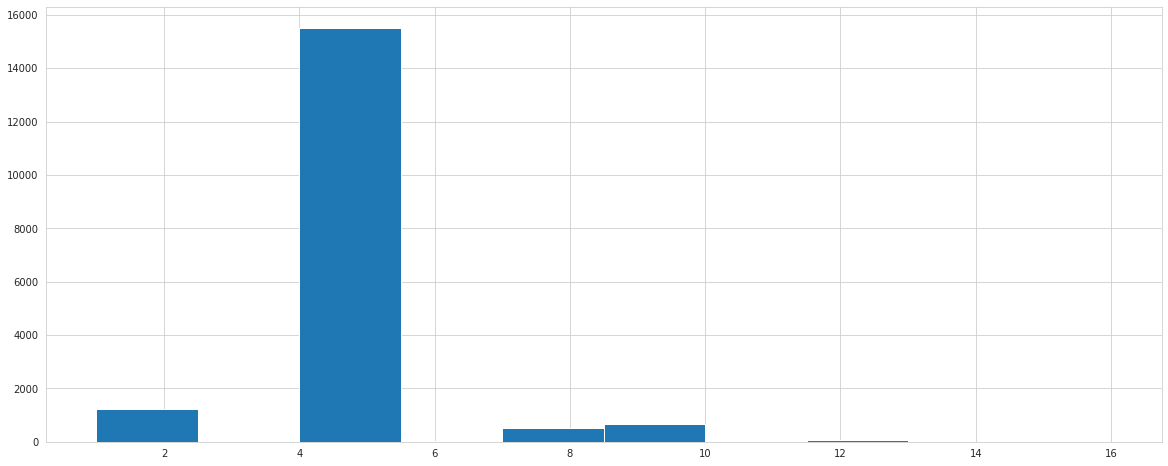

In [49]:
i = (i + 1) % len(columns)
next_histogram()

skipping Description(96)/Price(757)/add_info(15199): too many value types or not enough value types

3 distance_to_any_train float64 37


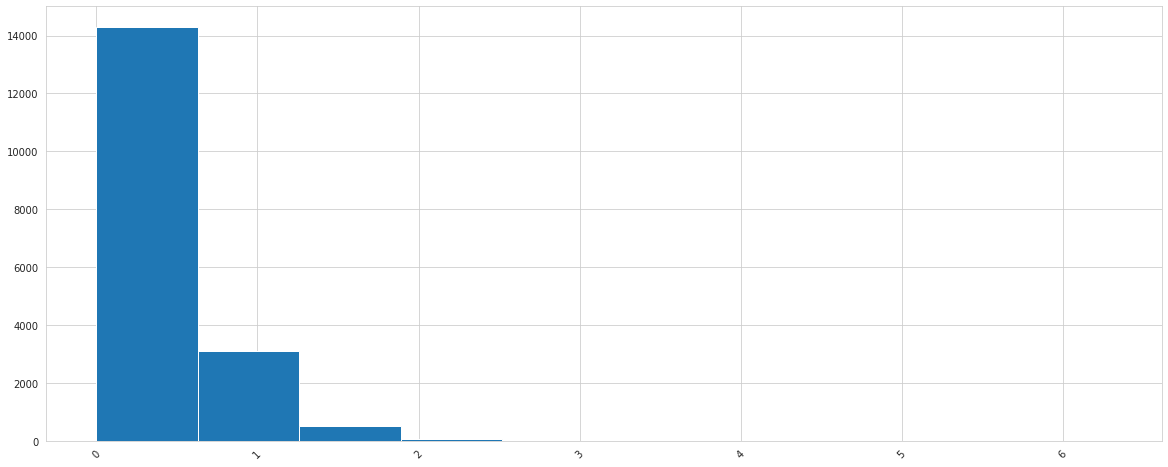

In [50]:
i = (i + 1) % len(columns)
next_histogram()

4 type object 28


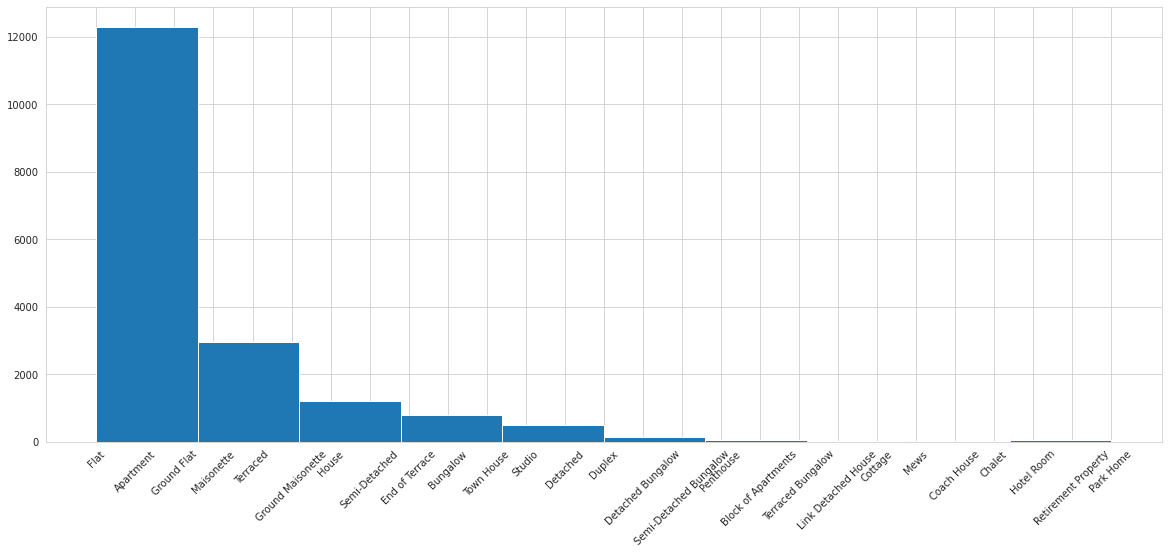

In [51]:
i = (i + 1) % len(columns)
next_histogram()

5 bedrooms float64 7


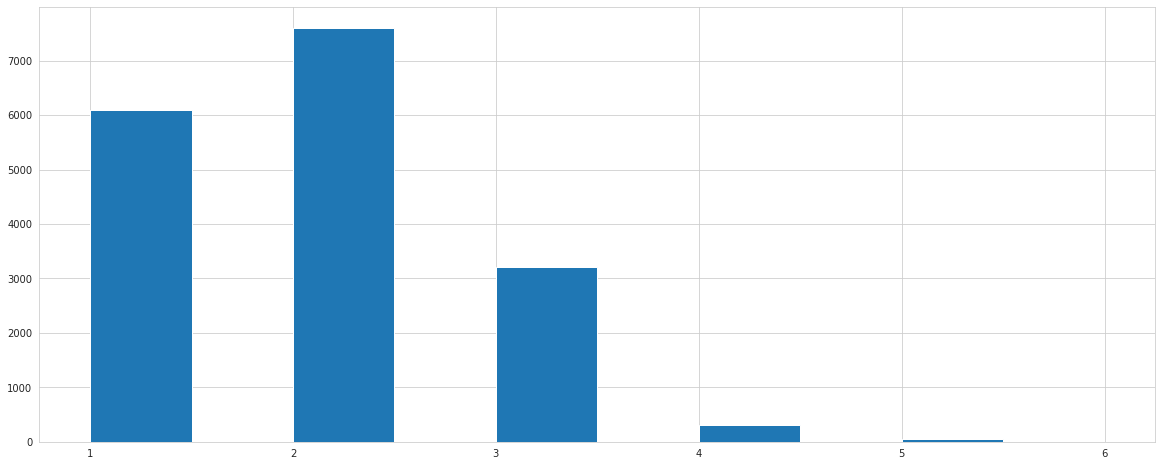

In [52]:
i = (i + 1) % len(columns)
next_histogram()

6 bathrooms float64 5


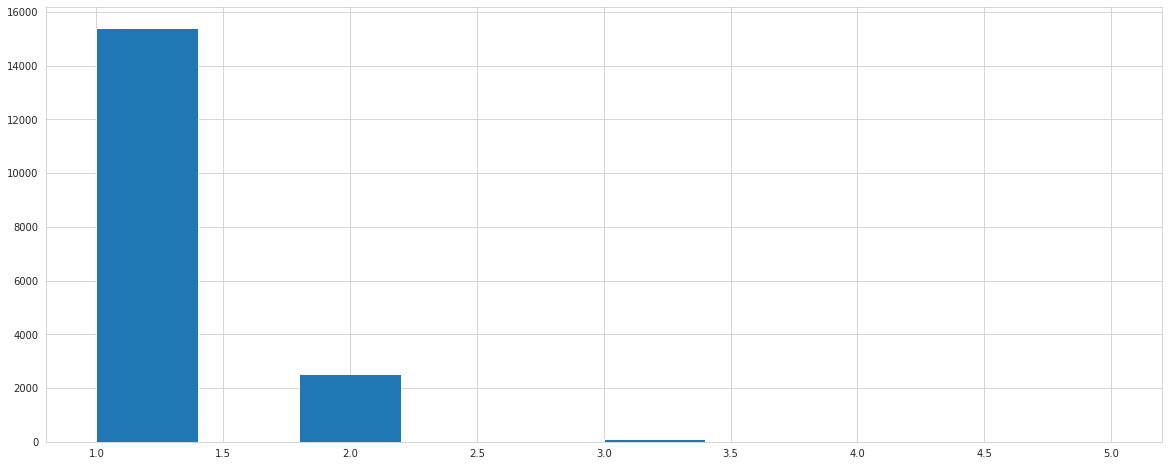

In [53]:
i = (i + 1) % len(columns)
next_histogram()

skipping size(1037)/other_key_info(1)/bullet_points(15906)/station_info(10724): too many value types or not enough value types

11 hold_type object 4


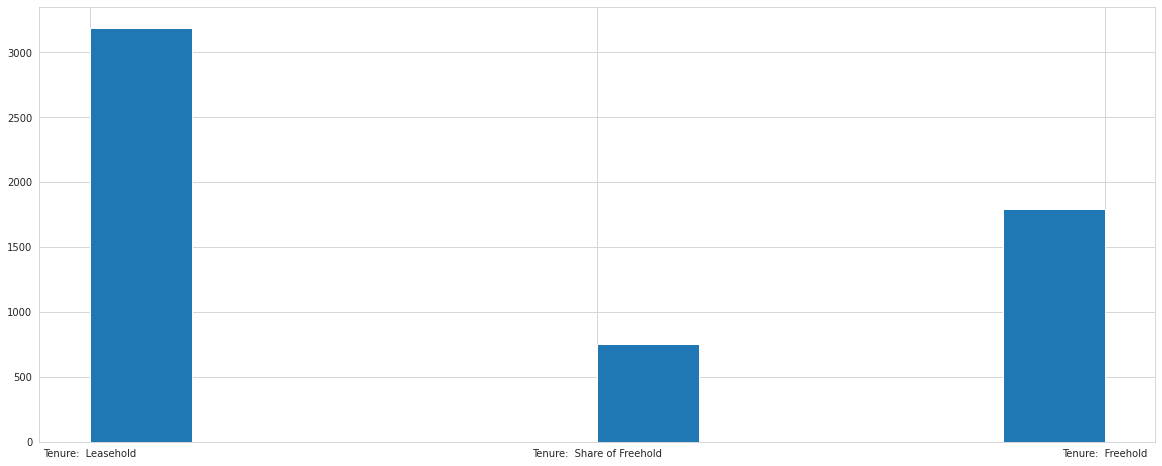

In [54]:
i = (i + 1) % len(columns)
next_histogram()

skipping short_description(999)/long_description(17846)/virtualTours(4592)/rooms(2169)/nearestAirports(1)/nearestStations(16183)/showSchoolInfo(1)/channel(2)/sizings(2480): too many value types or not enough value types

21 bedrooms_model float64 7


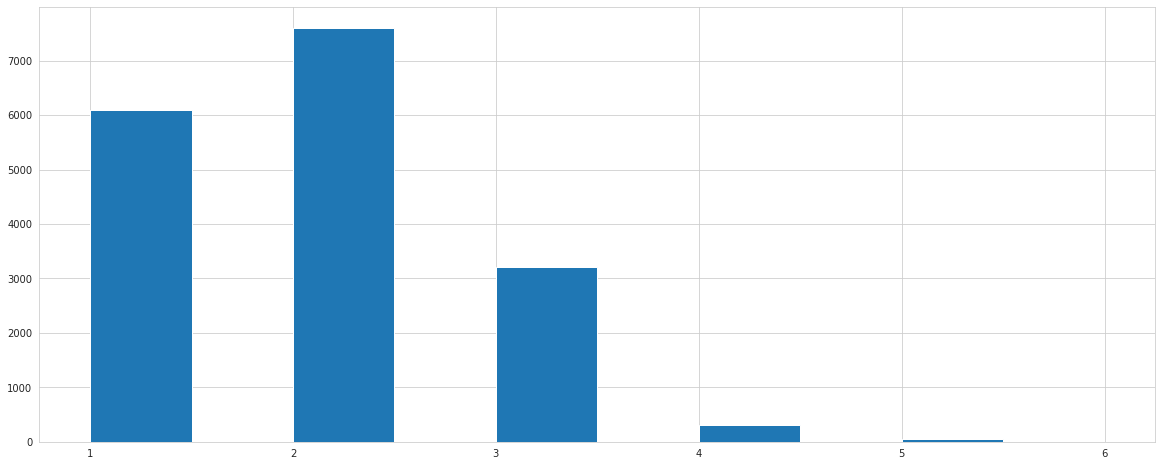

In [55]:
i = (i + 1) % len(columns)
next_histogram()

22 bathrooms_model float64 5


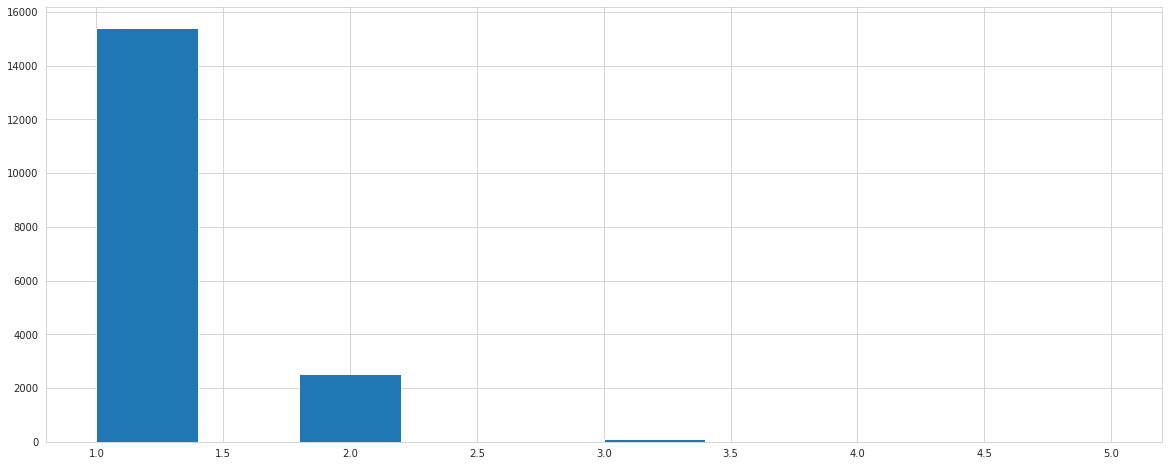

In [56]:
i = (i + 1) % len(columns)
next_histogram()

skipping transactionType(1): too many value types or not enough value types

24 tags object 16


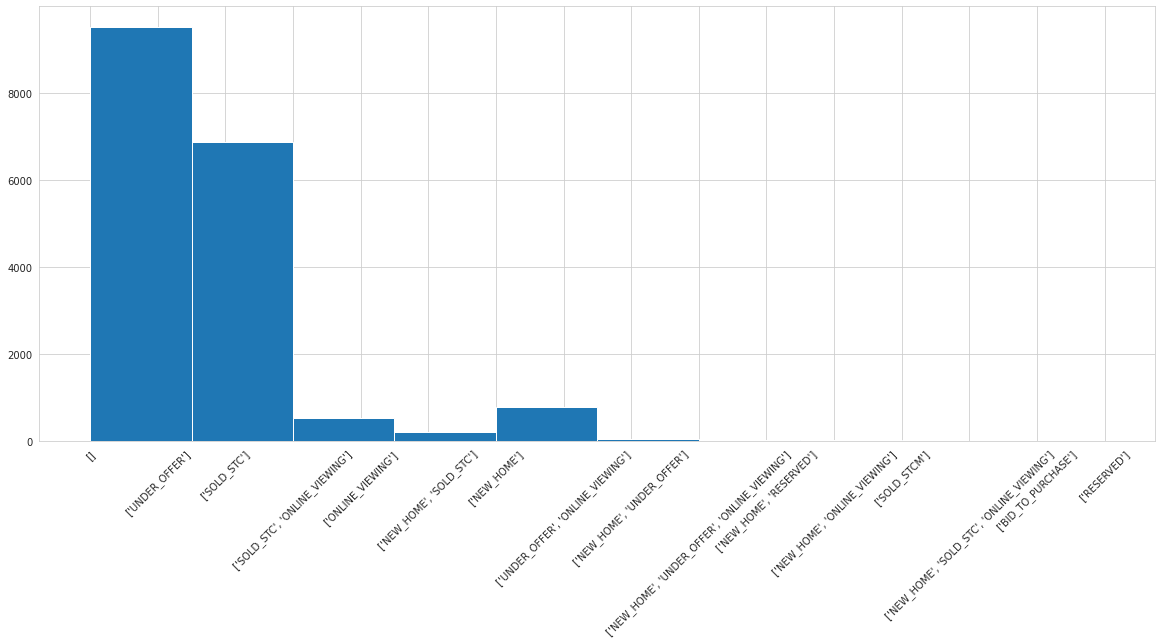

In [57]:
i = (i + 1) % len(columns)
next_histogram()

skipping infoReelItems(2071): too many value types or not enough value types

26 soldPropertyType object 5


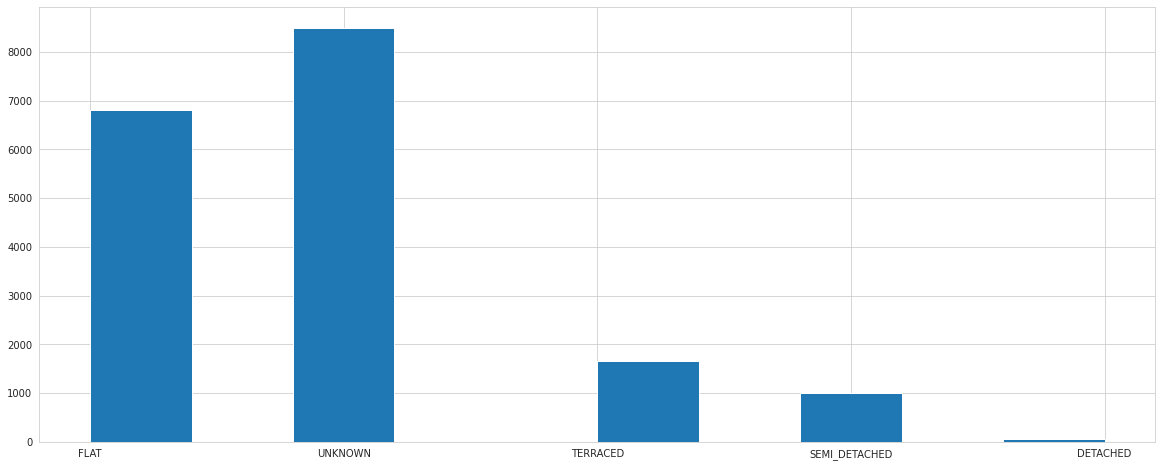

In [58]:
i = (i + 1) % len(columns)
next_histogram()

skipping auctionProvider(1): too many value types or not enough value types

28 propertySubType object 28


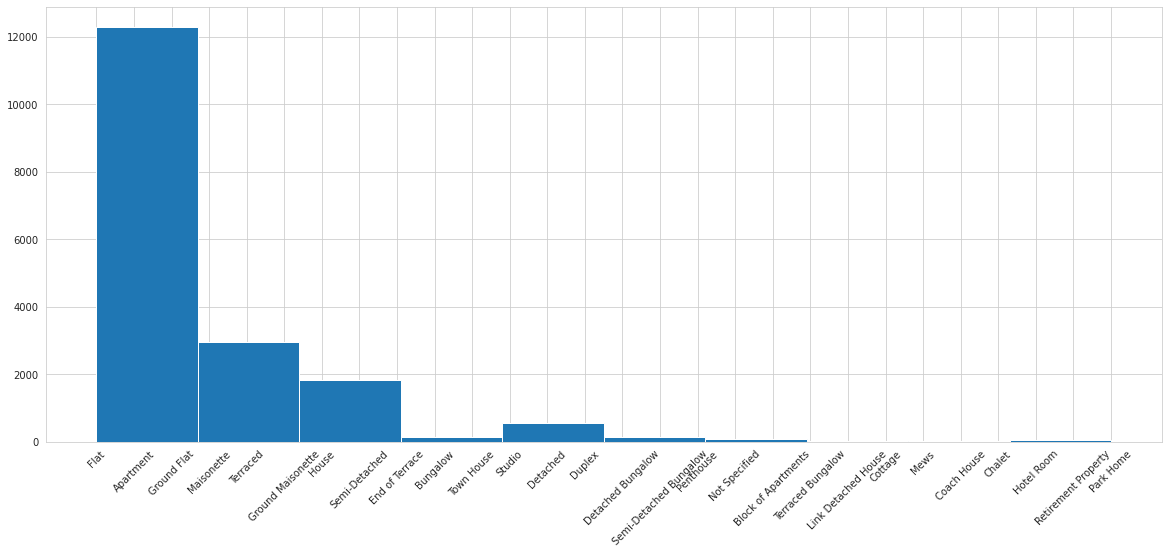

In [59]:
i = (i + 1) % len(columns)
next_histogram()

skipping businessForSale(1)/commercial(1)/commercialUseClasses(1)/affordableBuyingScheme(1)/status.published(2)/status.archived(2)/prices.primaryPrice(758)/prices.secondaryPrice(1): too many value types or not enough value types

37 prices.displayPriceQualifier object 9


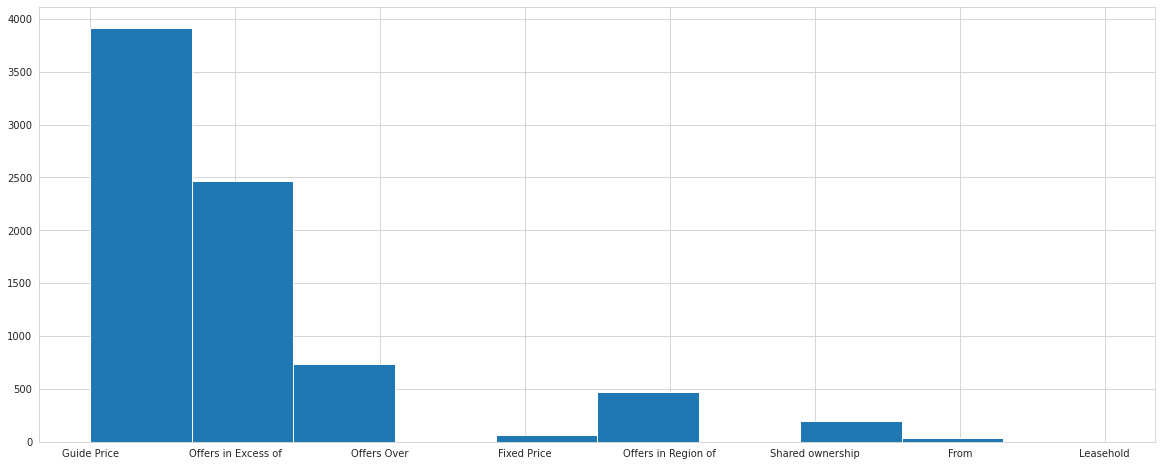

In [60]:
i = (i + 1) % len(columns)
next_histogram()

skipping prices.pricePerSqFt(2398)/prices.exchangeRate(1)/address.outcode(222)/location.latitude(15153)/location.longitude(15716)/listingHistory.listingUpdateReason(1038): too many value types or not enough value types

44 tenure.tenureType object 5


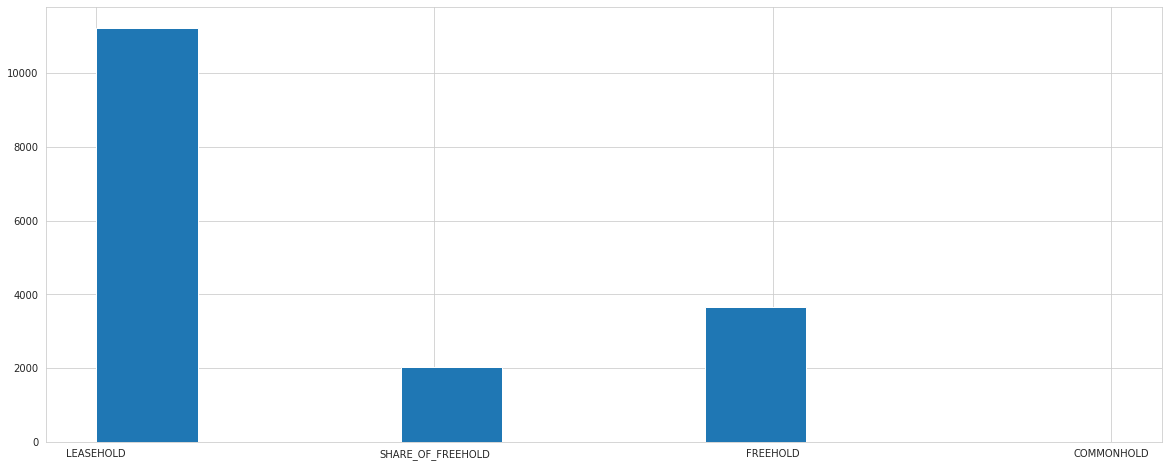

In [61]:
i = (i + 1) % len(columns)
next_histogram()